In [1]:
import torch
print(torch.cuda.is_available())  # Should print True if CUDA is available
print(torch.version.cuda)         # Should print the CUDA version
print(torch.cuda.device_count())  # Number of available GPUs
print(torch.cuda.get_device_name(0))  # GPU name (if available)

True
12.6
1
NVIDIA GeForce RTX 3050 Laptop GPU


In [2]:
import torch
x = torch.randn(10000, 10000).to("cuda")
print("Tensor on GPU:", x.device)


Tensor on GPU: cuda:0


In [3]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

In [4]:
import torch

def get_default_device():
    return torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

device = get_default_device()
print(f"Using device: {device}")  # Should print "cuda" if GPU is available


Using device: cuda


In [5]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [3]:

dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"  # URL
# tar+zip archoive file format
download_url(dataset_url, ".")  # Correct function call


In [ ]:
with tarfile.open('./cifar10.tgz','r:gz') as tar:
    tar.extractall(path='./data')
    
    # dont do again

C:\Users\Bhavesh\AppData\Local\Temp\ipykernel_2280\3006906527.py:2: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path='./data')


KeyboardInterrupt: 

In [6]:
data_dir='./data/cifar10'

print(os.listdir(data_dir))

classes = os.listdir(data_dir+"/train")

print(classes)

['test', 'train']
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [7]:
airplane_files = os.listdir(data_dir +'./train/airplane')
print(f"total number of airplane train images are : {len(airplane_files)}")

total number of airplane train images are : 5000


In [8]:
dataset = ImageFolder(data_dir+'/train', transform=ToTensor())
# sue ImageFolder to load data as pytorch tensors where "data_dir+'/train' " is the training direcotry , and they converted into tenor using transporm = Totensor


In [9]:
len(dataset)

49999

In [10]:
dataset[0] # shows the tensor along with the label (in index numerical form i.e 0 for now)

(tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
          [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
          [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
          ...,
          [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
          [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
          [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],
 
         [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
          [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
          [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
          ...,
          [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
          [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
          [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],
 
         [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
          [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
          [0.8118, 0.8157, 0.8235,  ...,

In [11]:
img , label = dataset[10000]
print(img.shape , label )
img

# label determines to which class this image belongs to ie 0 for airplane and so on.....

torch.Size([3, 32, 32]) 2


tensor([[[0.6431, 0.4118, 0.4627,  ..., 0.4275, 0.4235, 0.3569],
         [0.6549, 0.4549, 0.2824,  ..., 0.4118, 0.4118, 0.3490],
         [0.5490, 0.5569, 0.4667,  ..., 0.4078, 0.3294, 0.3059],
         ...,
         [0.5451, 0.5569, 0.5294,  ..., 0.3490, 0.3804, 0.4941],
         [0.6392, 0.6000, 0.5725,  ..., 0.3333, 0.3843, 0.4980],
         [0.7176, 0.6902, 0.6039,  ..., 0.3686, 0.3569, 0.4784]],

        [[0.8078, 0.5490, 0.5804,  ..., 0.5765, 0.5765, 0.5059],
         [0.8353, 0.6275, 0.4275,  ..., 0.5569, 0.5569, 0.4980],
         [0.7490, 0.7569, 0.6392,  ..., 0.5451, 0.4706, 0.4510],
         ...,
         [0.5804, 0.6078, 0.6118,  ..., 0.5255, 0.5804, 0.6902],
         [0.6157, 0.6431, 0.6431,  ..., 0.5098, 0.5804, 0.6980],
         [0.6000, 0.7137, 0.6039,  ..., 0.5255, 0.5216, 0.6667]],

        [[0.3294, 0.2392, 0.3961,  ..., 0.2863, 0.2706, 0.2235],
         [0.3294, 0.1922, 0.1686,  ..., 0.3098, 0.2824, 0.2235],
         [0.2549, 0.2588, 0.3098,  ..., 0.3294, 0.2275, 0.

In [12]:
import matplotlib
import matplotlib.pyplot as plt


In [13]:
def show_example(img,label):
    print(f"Label : {dataset.classes[label]} , {str(label)}")
    plt.imshow(img.permute(1,2,0)) # its going to switch the places of changes
    # but why to use it to show image ??
    # the answer is ITS NECESAARY , why ??
    # bcz the tensor is in the channel of 3,32,32 but matplotlib expects the channel to be 32,32,3 .....
    # since our original tensor is in 3,32,32 we need to convert it into 32,32,3 to meet the argument of what matplotlib takes to show argiment
    # so thats why we use permute to get the 32,32,3 at first using permute(1,2,0) 0th ( i.e 3 ) to last , 1st index at 0 , 2nd index value at 1st index....ie 32,32,3 
     # will be used in plt.imshow  not 3,32,32 as 3,32,32 will show error and dosnt mathch the argument

In [14]:
img2,label2 = dataset[0]

Label : airplane , 0


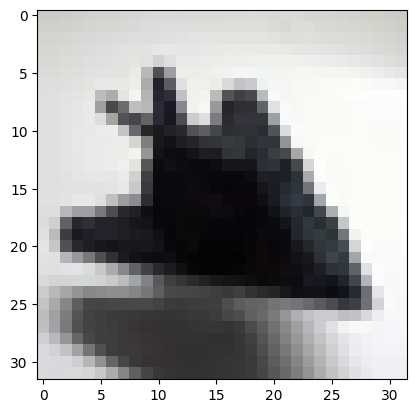

In [15]:
show_example(img2,label2)

Label : frog , 6


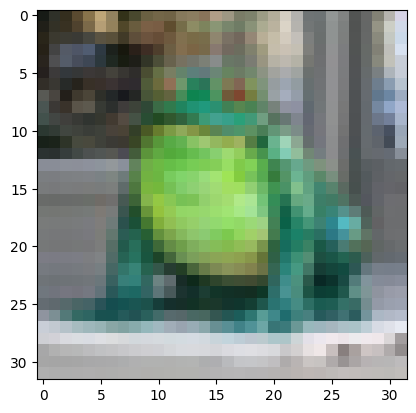

In [16]:
show_example(*dataset[30000])

In [17]:
random_seed= 42
torch.manual_seed(random_seed)

In [18]:
val_size = 5000

train_size  =  len(dataset) - val_size
 
train_ds  , val_ds = random_split(dataset,[train_size,val_size])
len(train_ds) , len(val_ds)

(44999, 5000)

In [19]:
from torch.utils.data.dataloader import DataLoader

batch_size = 128

In [29]:
train_dl = DataLoader(train_ds,batch_size,shuffle=True,num_workers=4,pin_memory=True)
val_dl =  DataLoader(val_ds,batch_size*2,num_workers=4,pin_memory=True) #*2 bcz we arent using Gradient descent so we will be using half the memory so double the batch to speed validation test



In [21]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig,ax = plt.subplots(figsize=(12,6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

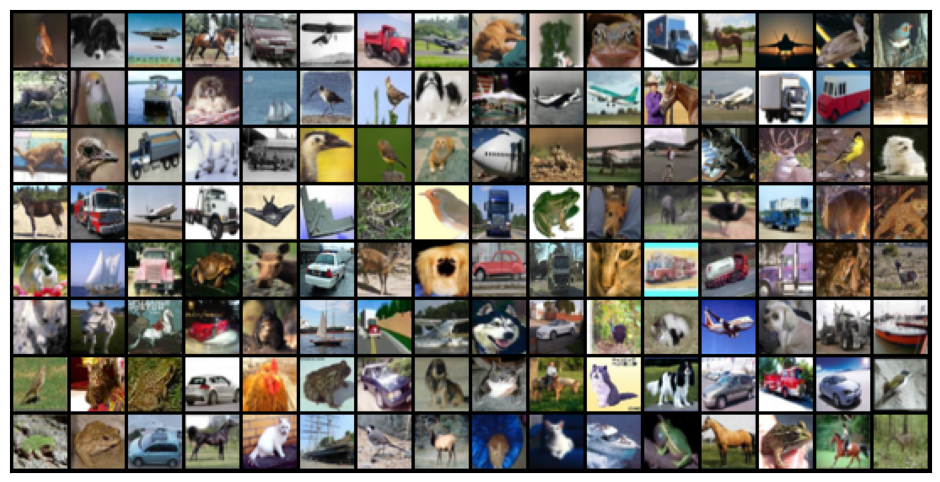

In [ ]:
show_batch(train_dl)

In [23]:
import torch.nn as nn 
import torch.nn.functional as F


In [24]:
conv = nn.Conv2d(3,8,kernel_size=3,stride=1,padding=1)
# we have 3 input channels , output has 8 channels ,, we take 3 channel image and convert it into 8 channel output.....
#kernel size is 3 means the kernel is a 3x3 matrix

In [25]:
pool = nn.MaxPool2d(2,2)

In [30]:
for images ,labels in train_dl:
    print('images.shape :',images.shape)
    out= conv(images)
    out=pool(out)
    print('out.shape :',out.shape)
    break

images.shape : torch.Size([128, 3, 32, 32])
out.shape : torch.Size([128, 8, 16, 16])


In [31]:
conv.weight[0]

tensor([[[ 0.0204,  0.0095,  0.0666],
         [ 0.0400, -0.0671,  0.1560],
         [ 0.0757,  0.0781, -0.1201]],

        [[-0.0989,  0.0508,  0.1701],
         [ 0.0643,  0.1109, -0.0033],
         [ 0.1575, -0.1299,  0.1855]],

        [[ 0.0587, -0.1072,  0.1864],
         [ 0.0403,  0.0994,  0.1686],
         [-0.1169, -0.1352,  0.1361]]], grad_fn=<SelectBackward0>)

In [45]:
simple_model_1 = nn.Sequential(
    nn.Conv2d(3,8,kernel_size=3,stride=1,padding=1)
    nn.MaxPool(2,2)
)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (154690397.py, line 2)

In [32]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        """Aggregates validation loss and accuracy over the entire epoch."""
        val_losses = [x['val_loss'] for x in outputs]
        val_accuracies = [x['val_acc'] for x in outputs]
        epoch_loss = torch.stack(val_losses).mean()  # Average loss
        epoch_acc = torch.stack(val_accuracies).mean()  # Average accuracy
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']
        ))
        
def accuracy(outputs, labels):
    """Computes the accuracy of predictions"""
    _, preds = torch.max(outputs, dim=1)  # Get predicted class indices
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


In [33]:
class Cifar10Model(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network=nn.Sequential(
            #input: 3,32,32
            nn.Conv2d(3,32,kernel_size=3,padding=1),
            #output: 32,32,32
            nn.ReLU(),
            # if +ve value retain it , it -ve value change it to 0
            nn.Conv2d(32,64,kernel_size=3,padding=1),
            #output: 64,32,32
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            #output: 64,16,16
            
            nn.Conv2d(64,128,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.Conv2d(128,128,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            #output: 128,8,8
            
            nn.Conv2d(128,256,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.Conv2d(256,256,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            #output: 256,4,4
            
            nn.Flatten(),
            nn.Linear(256*4*4,1024),
            nn.ReLU(),
            nn.Linear(1024,512),
            nn.ReLU(),
            nn.Linear(512,10)
            # it give 10 output since the number of classes are 10
        )
        
    def forward(self,xb):
        return self.network(xb)

In [34]:
model = Cifar10Model()
model

Cifar10Model(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_feature

In [35]:
for images,labels in train_dl:
    print(f"images.shape :{images.shape}")
    out=model(images)
    print(f"out.shape : {out.shape}")
    print(f"out[0]: {out[0]}")
    break
    

images.shape :torch.Size([128, 3, 32, 32])
out.shape : torch.Size([128, 10])
out[0]: tensor([-0.0426,  0.0200,  0.0029,  0.0063, -0.0415, -0.0376, -0.0216,  0.0422,
        -0.0054,  0.0157], grad_fn=<SelectBackward0>)


In [36]:
# Function to get the default device (GPU if available, otherwise CPU)
def get_default_device():
    """Pick GPU if available, else CPU"""
    return torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Function to move tensors to the selected device
def to_device(data, device):
    """Move tensor(s) to the specified device"""
    if isinstance(data, (list, tuple)):  # If data is a list/tuple of tensors
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)  # Move tensor to device

# Wrapper class for moving a DataLoader to a device
class DeviceDataLoader:
    """Wraps a dataloader to move data to a device"""
    def __init__(self, dataloader, device):
        self.dataloader = dataloader
        self.device = device

    def __iter__(self):
        """Move batch to the device"""
        for batch in self.dataloader:
            yield to_device(batch, self.device)  # Move each batch to device

    def __len__(self):
        """Number of batches"""
        return len(self.dataloader)



In [37]:

# Example usage:
device = get_default_device()
print("Using device:", device)

Using device: cuda


In [38]:
train_dl = DeviceDataLoader(train_dl,device)
val_dl = DeviceDataLoader(val_dl,device)
to_device(model,device)

Cifar10Model(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_feature

In [39]:
import torch

# Function to evaluate the model on the validation set
@torch.no_grad()  # Disable gradient computation for faster evaluation
def evaluate(model, val_loader):
    """Evaluates the model on the validation set and returns average loss and accuracy"""
    model.eval()  # Set model to evaluation mode
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)  # Aggregate results

# Function to train the model
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    """Train the model using training and validation sets"""
    history = []  # Store loss and accuracy per epoch
    optimizer = opt_func(model.parameters(), lr=lr)  # Optimizer (default: SGD)

    for epoch in range(epochs):
        # Training Phase
        model.train()  # Set model to training mode
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss.item())
            loss.backward()  # Compute gradients
            optimizer.step()  # Update weights
            optimizer.zero_grad()  # Reset gradients

        # Validation Phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.tensor(train_losses).mean().item()
        model.epoch_end(epoch, result)  # Print epoch summary
        history.append(result)  # Store epoch results

    return history  # Return training history


In [40]:
model = to_device(Cifar10Model(),device)


In [41]:
evaluate(model,val_dl)

{'val_loss': 2.3032310009002686, 'val_acc': 0.09948299825191498}

In [57]:
num_epochs=10
opt_func = torch.optim.Adam
lr=0.0001

In [58]:
history=fit(num_epochs,lr,model,train_dl,val_dl,opt_func)

Epoch [0], train_loss: 2.3026, val_loss: 2.3026, val_acc: 0.1003
Epoch [1], train_loss: 2.3026, val_loss: 2.3026, val_acc: 0.1003
Epoch [2], train_loss: 2.3026, val_loss: 2.3026, val_acc: 0.0945
Epoch [3], train_loss: 2.3026, val_loss: 2.3026, val_acc: 0.0945


KeyboardInterrupt: 

In [66]:
import os

image_path = "./data/cifar10/train/bird/4233.png"

if os.path.exists(image_path):
    os.remove(image_path)
    print(f"Deleted corrupted image: {image_path}")
else:
    print("Image file not found!")


Deleted corrupted image: ./data/cifar10/train/bird/4233.png


In [68]:
from PIL import Image

image_path = "./data/cifar10/train/bird/4233.png"
try:
    img = Image.open(image_path)
    img.show()  # Opens the image
except Exception as e:
    print(f"Error opening image: {e}")


Error opening image: [Errno 2] No such file or directory: './data/cifar10/train/bird/4233.png'


In [44]:
import matplotlib.pyplot as plt

def plot_accuracies(history):
    """Plots validation accuracy over epochs."""
    accuracies = [result['val_acc'] for result in history]  # Extract accuracies
    plt.plot(accuracies, '-o', label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy Over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()


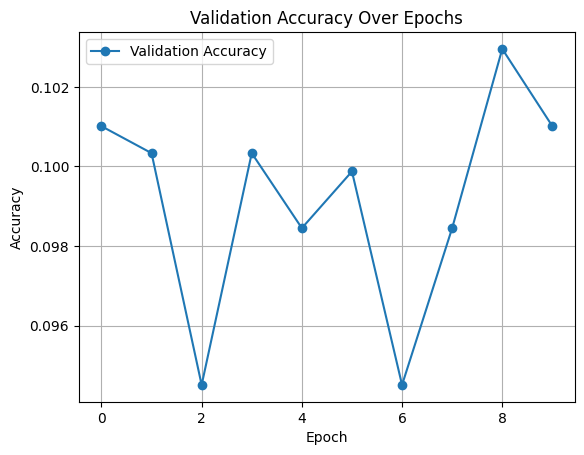

In [45]:
# After training the model
plot_accuracies(history)



In [46]:
import matplotlib.pyplot as plt

def plot_losses(history):
    """Plots training and validation loss over epochs."""
    train_losses = [result['train_loss'] for result in history]  # Extract training losses
    val_losses = [result['val_loss'] for result in history]  # Extract validation losses
    
    plt.plot(train_losses, '-o', label='Training Loss')
    plt.plot(val_losses, '-o', label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training & Validation Loss Over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()


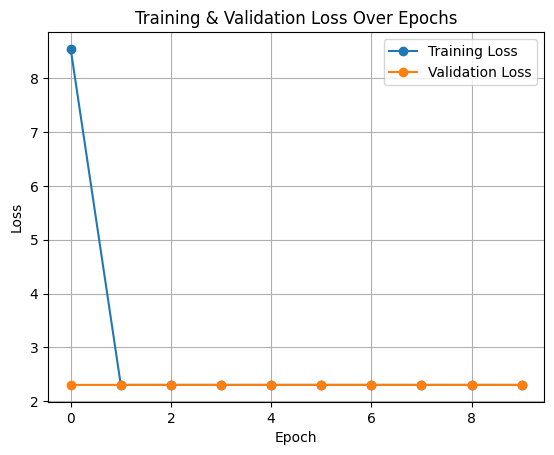

In [47]:
# After training the model
plot_losses(history)


In [48]:
test_dataset = ImageFolder(data_dir+'/test',transform=ToTensor())

In [49]:
def predict_image(img,model):
    
    xb=to_device(img.unsqueeze(0),device)
    
    yb = model(xb)
    
    _, preds = torch.max(yb,dim=1)
    
    return dataset.classes[preds[0].item()]

label: bird , predicted : cat


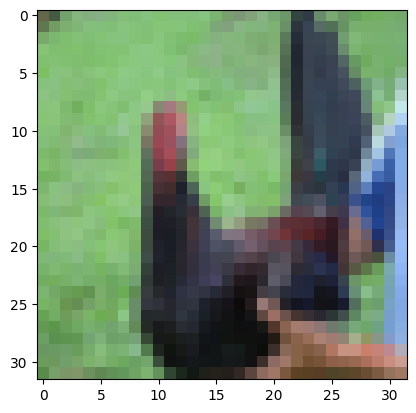

In [54]:
img,label = test_dataset[2000]
plt.imshow(img.permute(1,2,0))
print(f"label: {dataset.classes[label]} , predicted : {predict_image(img,model)}")

In [ ]:
# there is some code afer 1:48:00 in  https://www.youtube.com/live/d9QHNkD_Pos?si=JYO60Zn5xGCS86ZY

In [ ]:
test_loader = DeviceDataLoader(DataLoader(test_dataset,batch_size*2),device)
result = evaluate(model,test_loader)
result

In [ ]:
torch.save(model.state_dict() ,'cifar10.pth')